In [ ]:
from transpile_benchy.metrics.gate_counts import (
    DepthMetric,
    TotalMetric,
    TotalSwaps,
)
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import Mirage, QiskitLevel3
from mirror_gates.utilities import SubsMetric
from mirror_gates.logging import transpile_benchy_logger

In [ ]:
from clonk.backend_utils.coupling_map import Tree, Corral

tree = Tree()
corral = Corral(num_snails=18)

In [ ]:
# N = 4
# coupling_map = CouplingMap.from_line(N)
# coupling_map = CouplingMap.from_heavy_hex(5)
square = CouplingMap.from_grid(6, 6)

In [ ]:
from transpile_benchy.library import CircuitLibrary

library = CircuitLibrary.from_txt("../../circuits/medium_circuits.txt")
# library = CircuitLibrary.from_txt("../../circuits/debug.txt")

In [ ]:
# XXX set consolidate to False
# this is allowed only because my pass manager will preserve consolidation
# see post_stage, I call fastconsolidate manually

# NOTE: use TotalSwaps to verify baselines have > 0 swaps
# otherwise, there is no room for improvement.
# we can include these if we want to show our methods will still work
# but somewhat trivial since we just append VF2Layout
metrics = [
    DepthMetric(consolidate=False),
    TotalMetric(consolidate=False),
    TotalSwaps(consolidate=False),
    SubsMetric(),
]

transpilers = [
    QiskitLevel3(square, name="Qiskit-square"),
    Mirage(square, name="Mirage-square"),
    # QiskitLevel3(tree, name="Qiskit-tree"),
    # Mirage(tree, name="Mirage-tree"),
    QiskitLevel3(corral, name="Qiskit-corral"),
    Mirage(corral, name="Mirage-corral"),
]

In [ ]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    circuit_library=library,
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=1,
)

benchmark.run()
# print(benchmark)

In [ ]:
# print(benchmark)

In [9]:
benchmark.summary_statistics(transpilers[2], transpilers[3])

{'monodromy_depth': {'average_change': -28.20576599885629,
  'aggregrate_change': -31.607530774800864,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'multiplier_n15'},
 'monodromy_total': {'average_change': -11.491790683373749,
  'aggregrate_change': -12.85772690106296,
  'best_circuit': 'qpeexact_n16',
  'worst_circuit': 'multiplier_n15'},
 'total_swaps': {'average_change': -53.23867790433139,
  'aggregrate_change': -81.5347721822542,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'multiplier_n15'},
 'accepted_subs': {'average_change': inf,
  'aggregrate_change': inf,
  'best_circuit': 'bigadder_n18',
  'worst_circuit': 'qec9xz_n17'},
 'total_runtime': {'average_change': 9493.511336009693,
  'aggregrate_change': 7134.302996437128,
  'best_circuit': 'portfolioqaoa_n16',
  'worst_circuit': 'knn_n25'}}

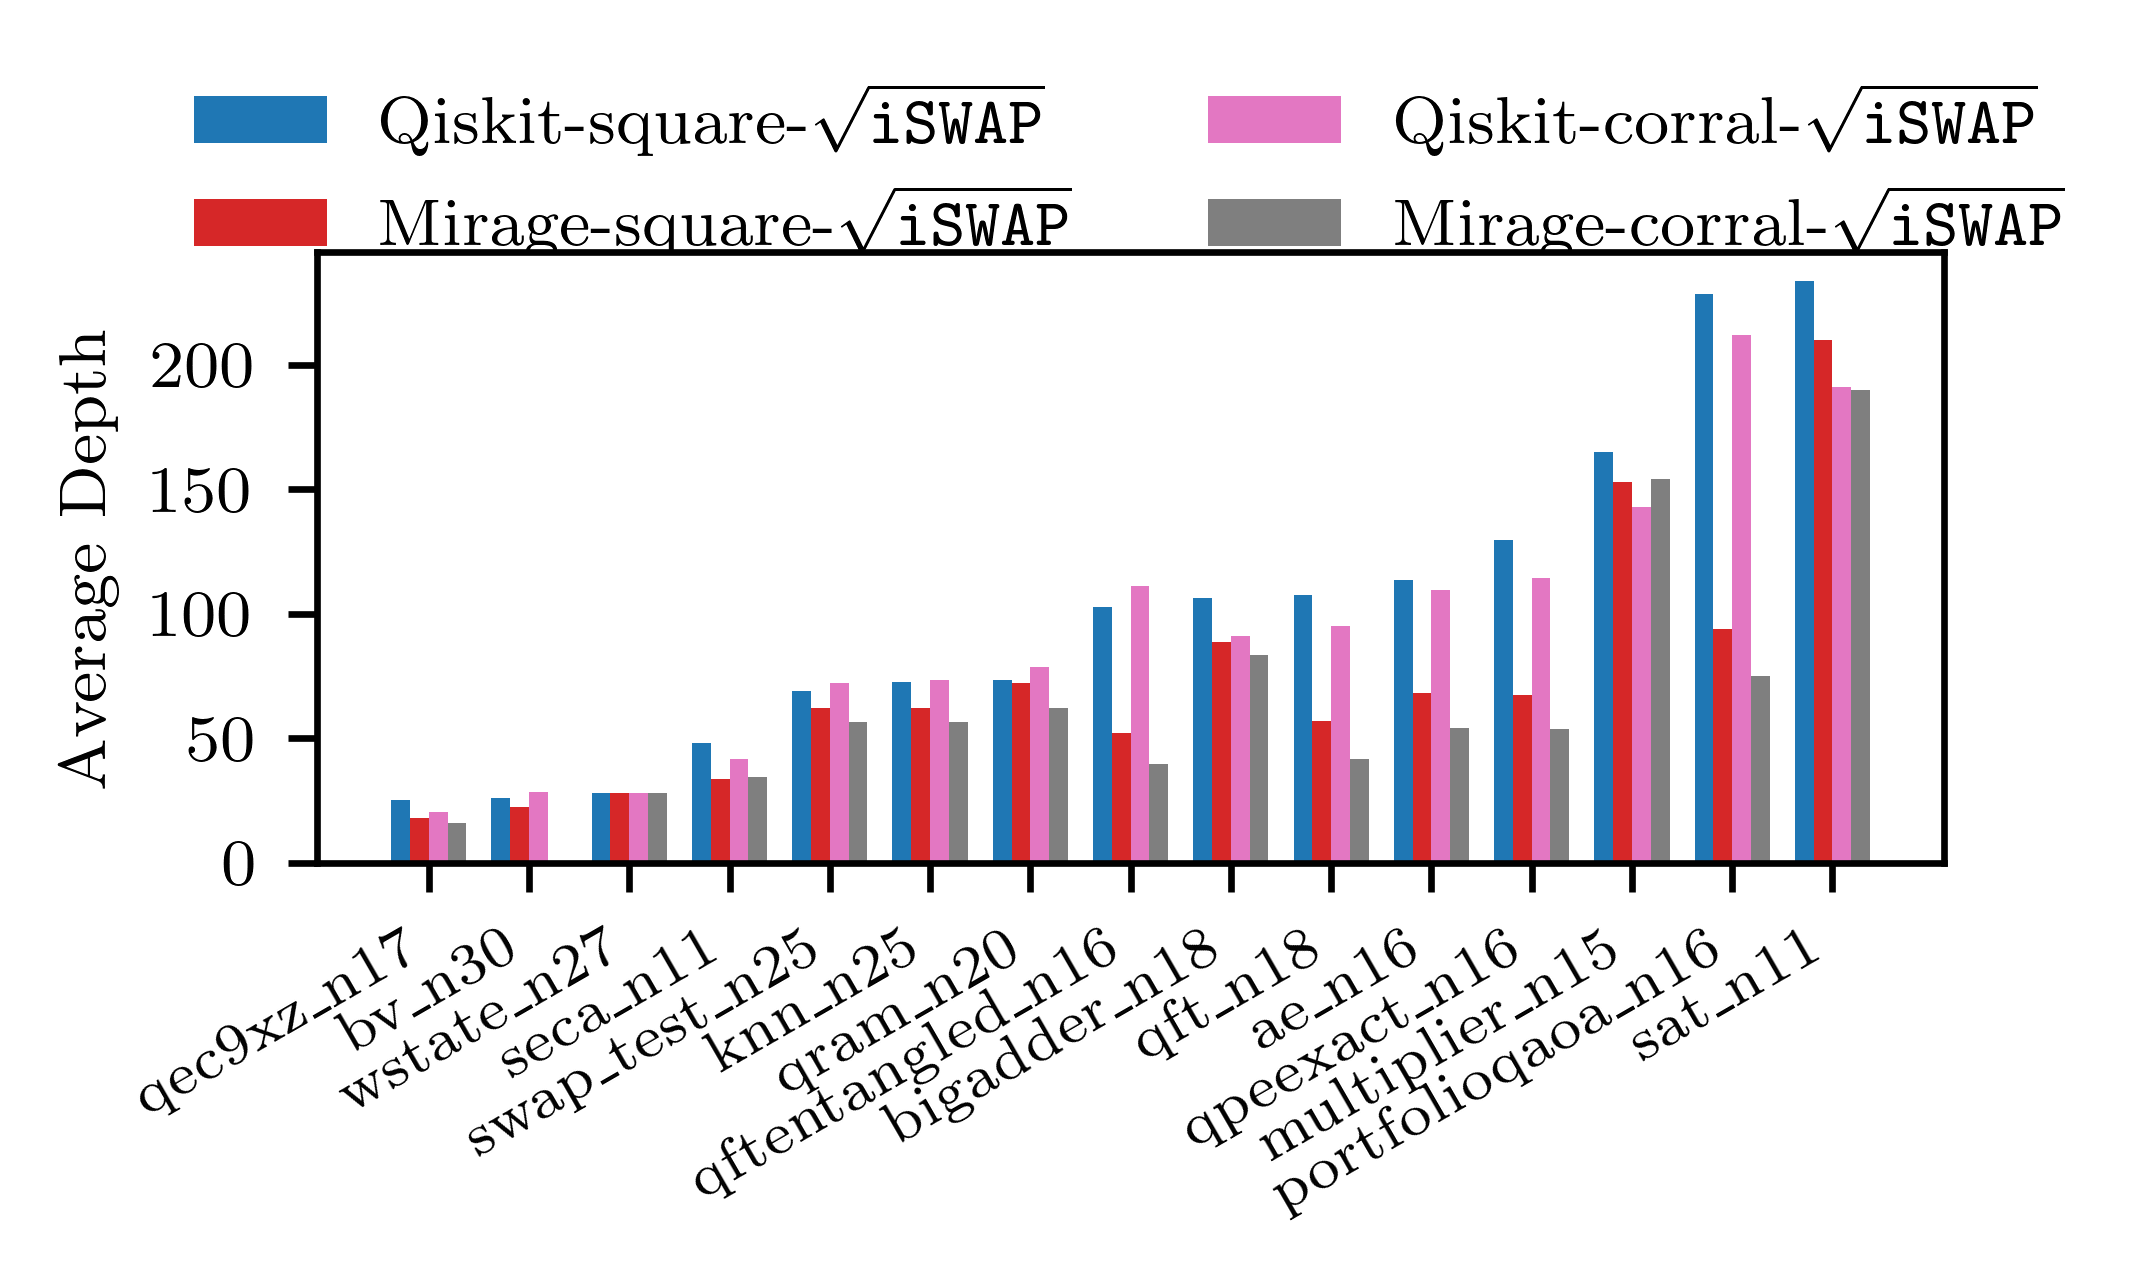

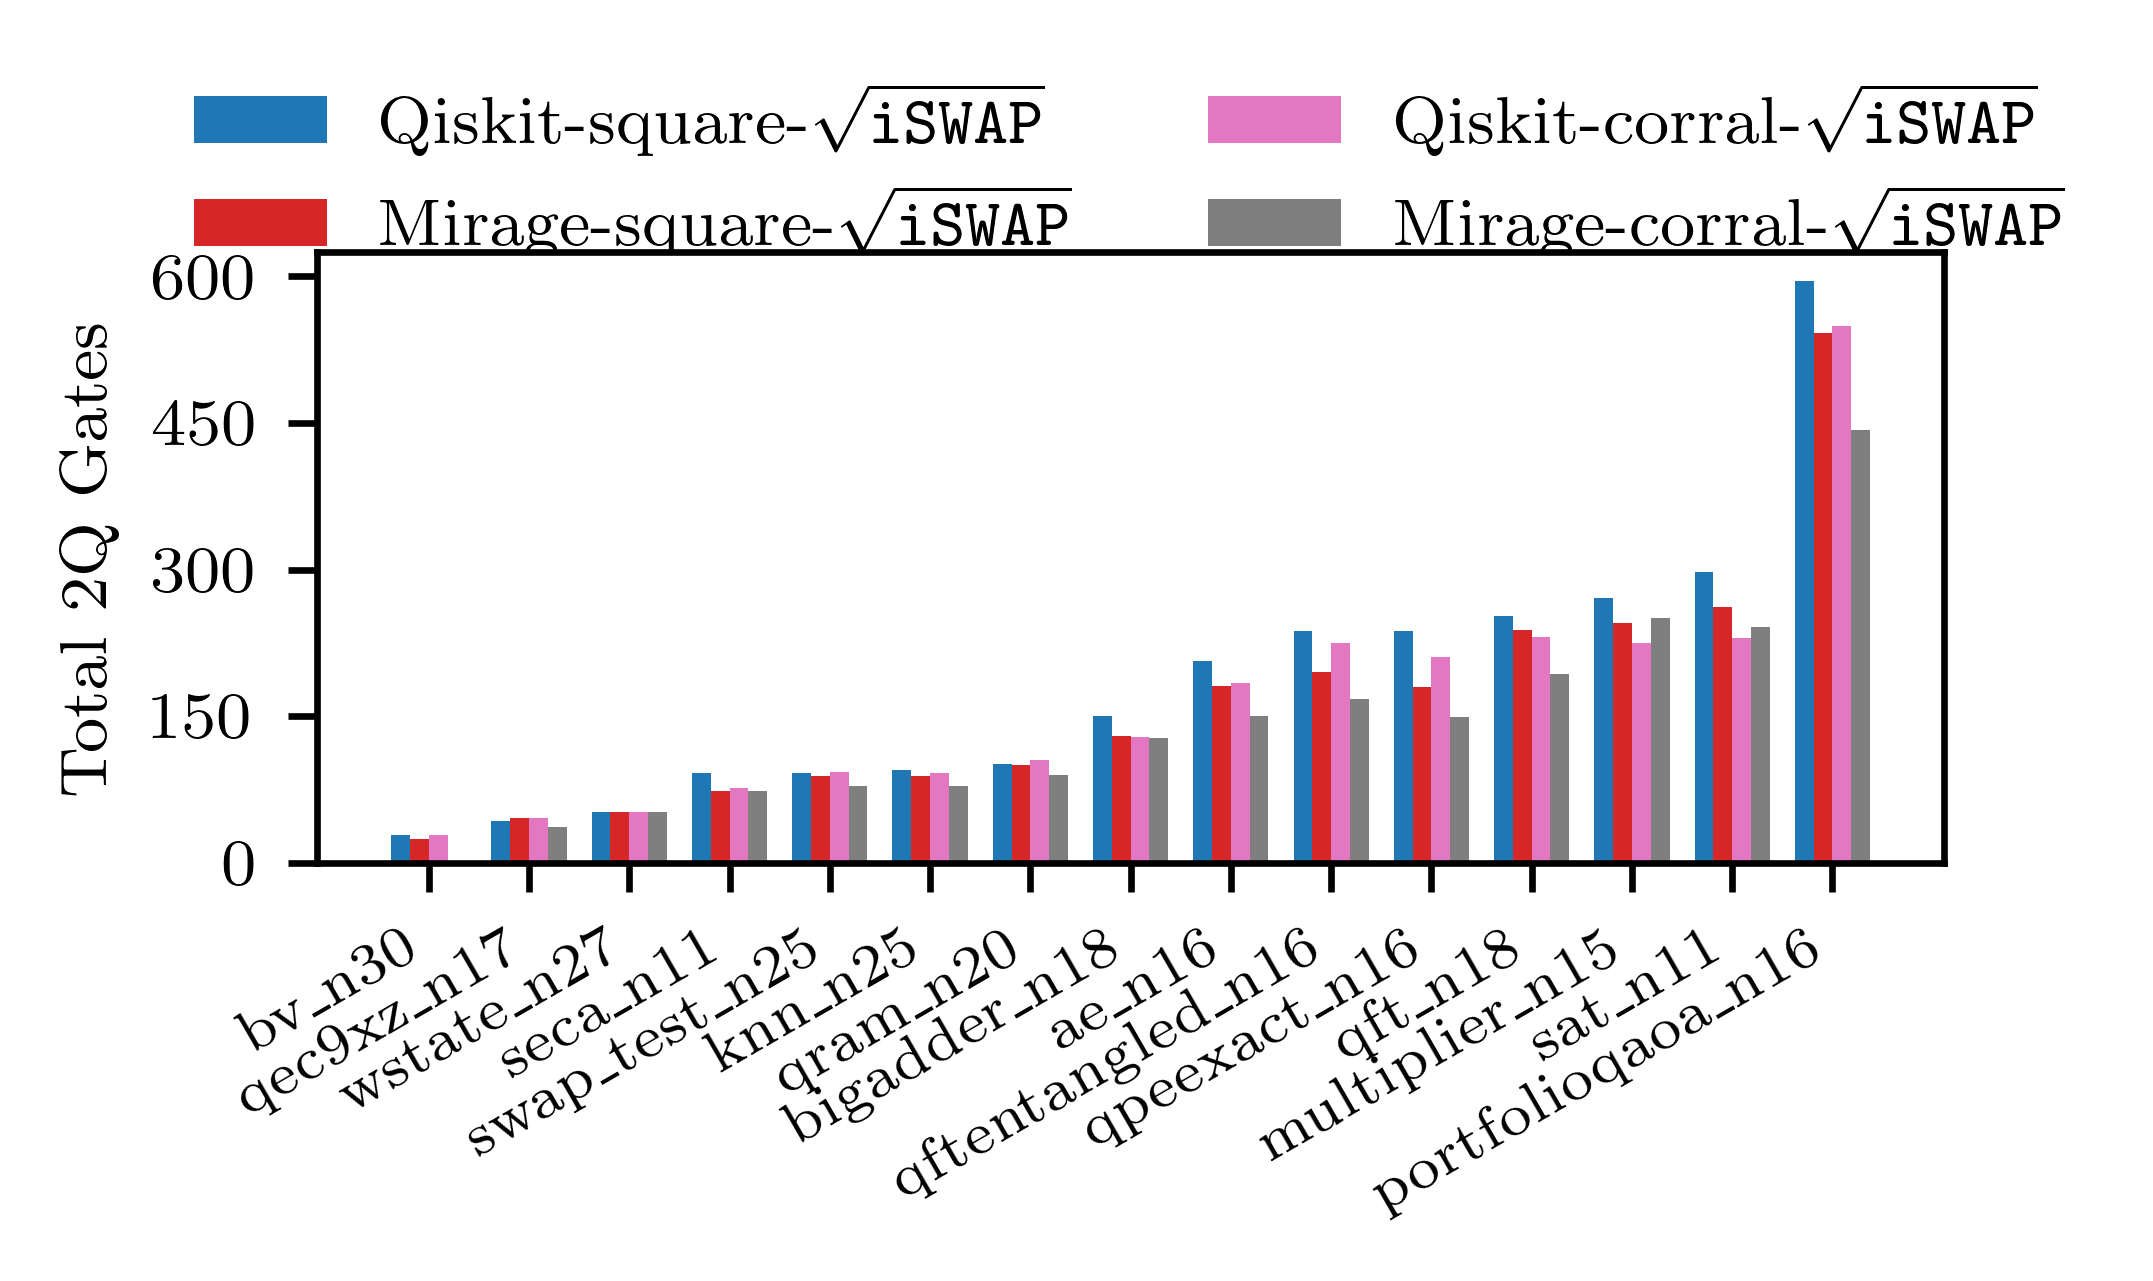

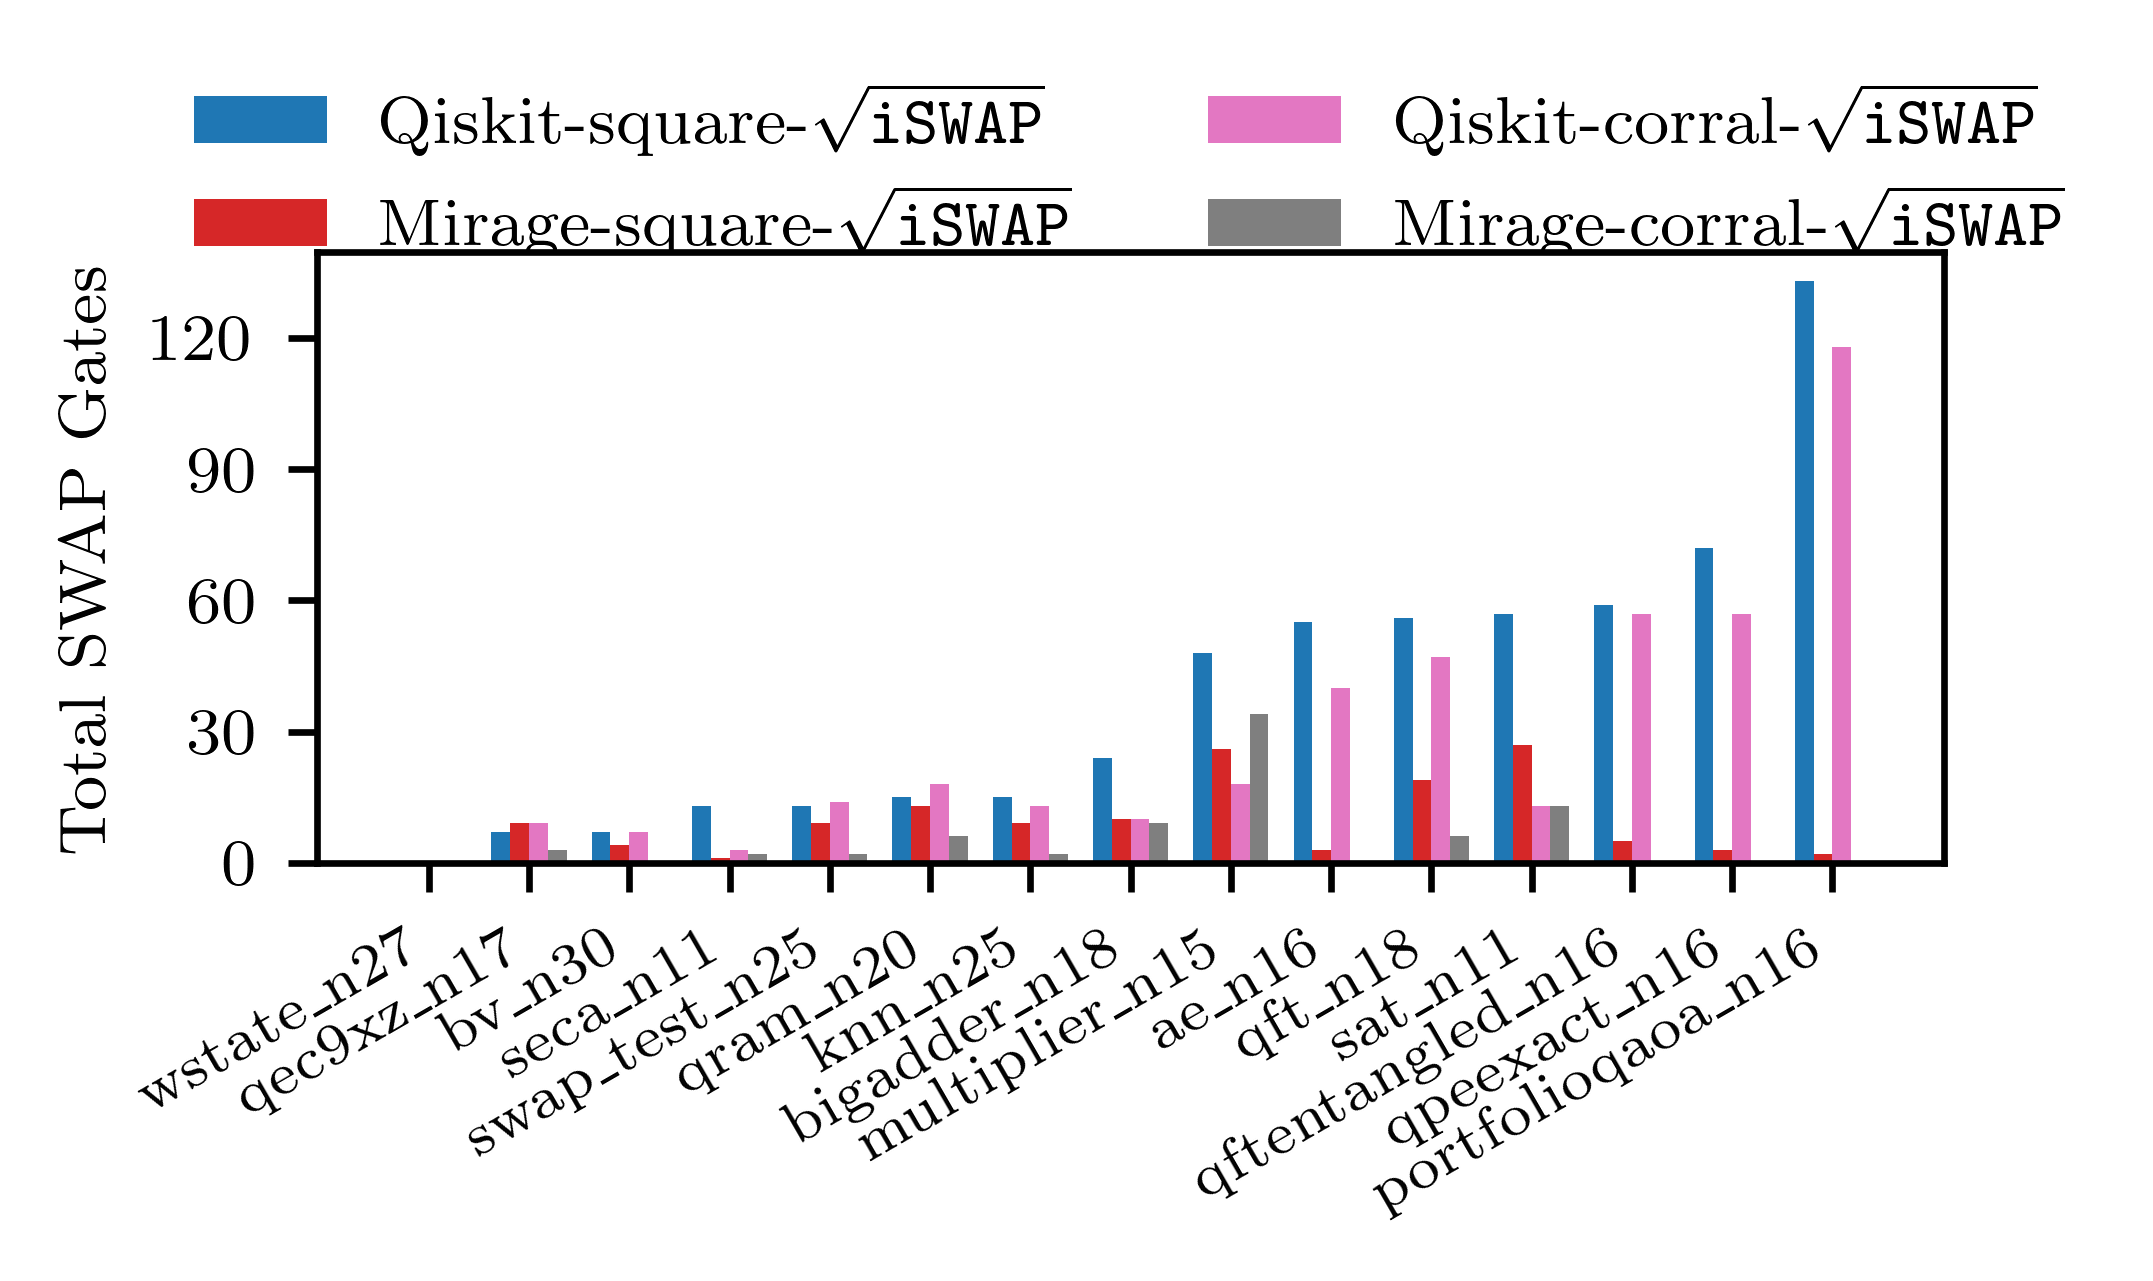

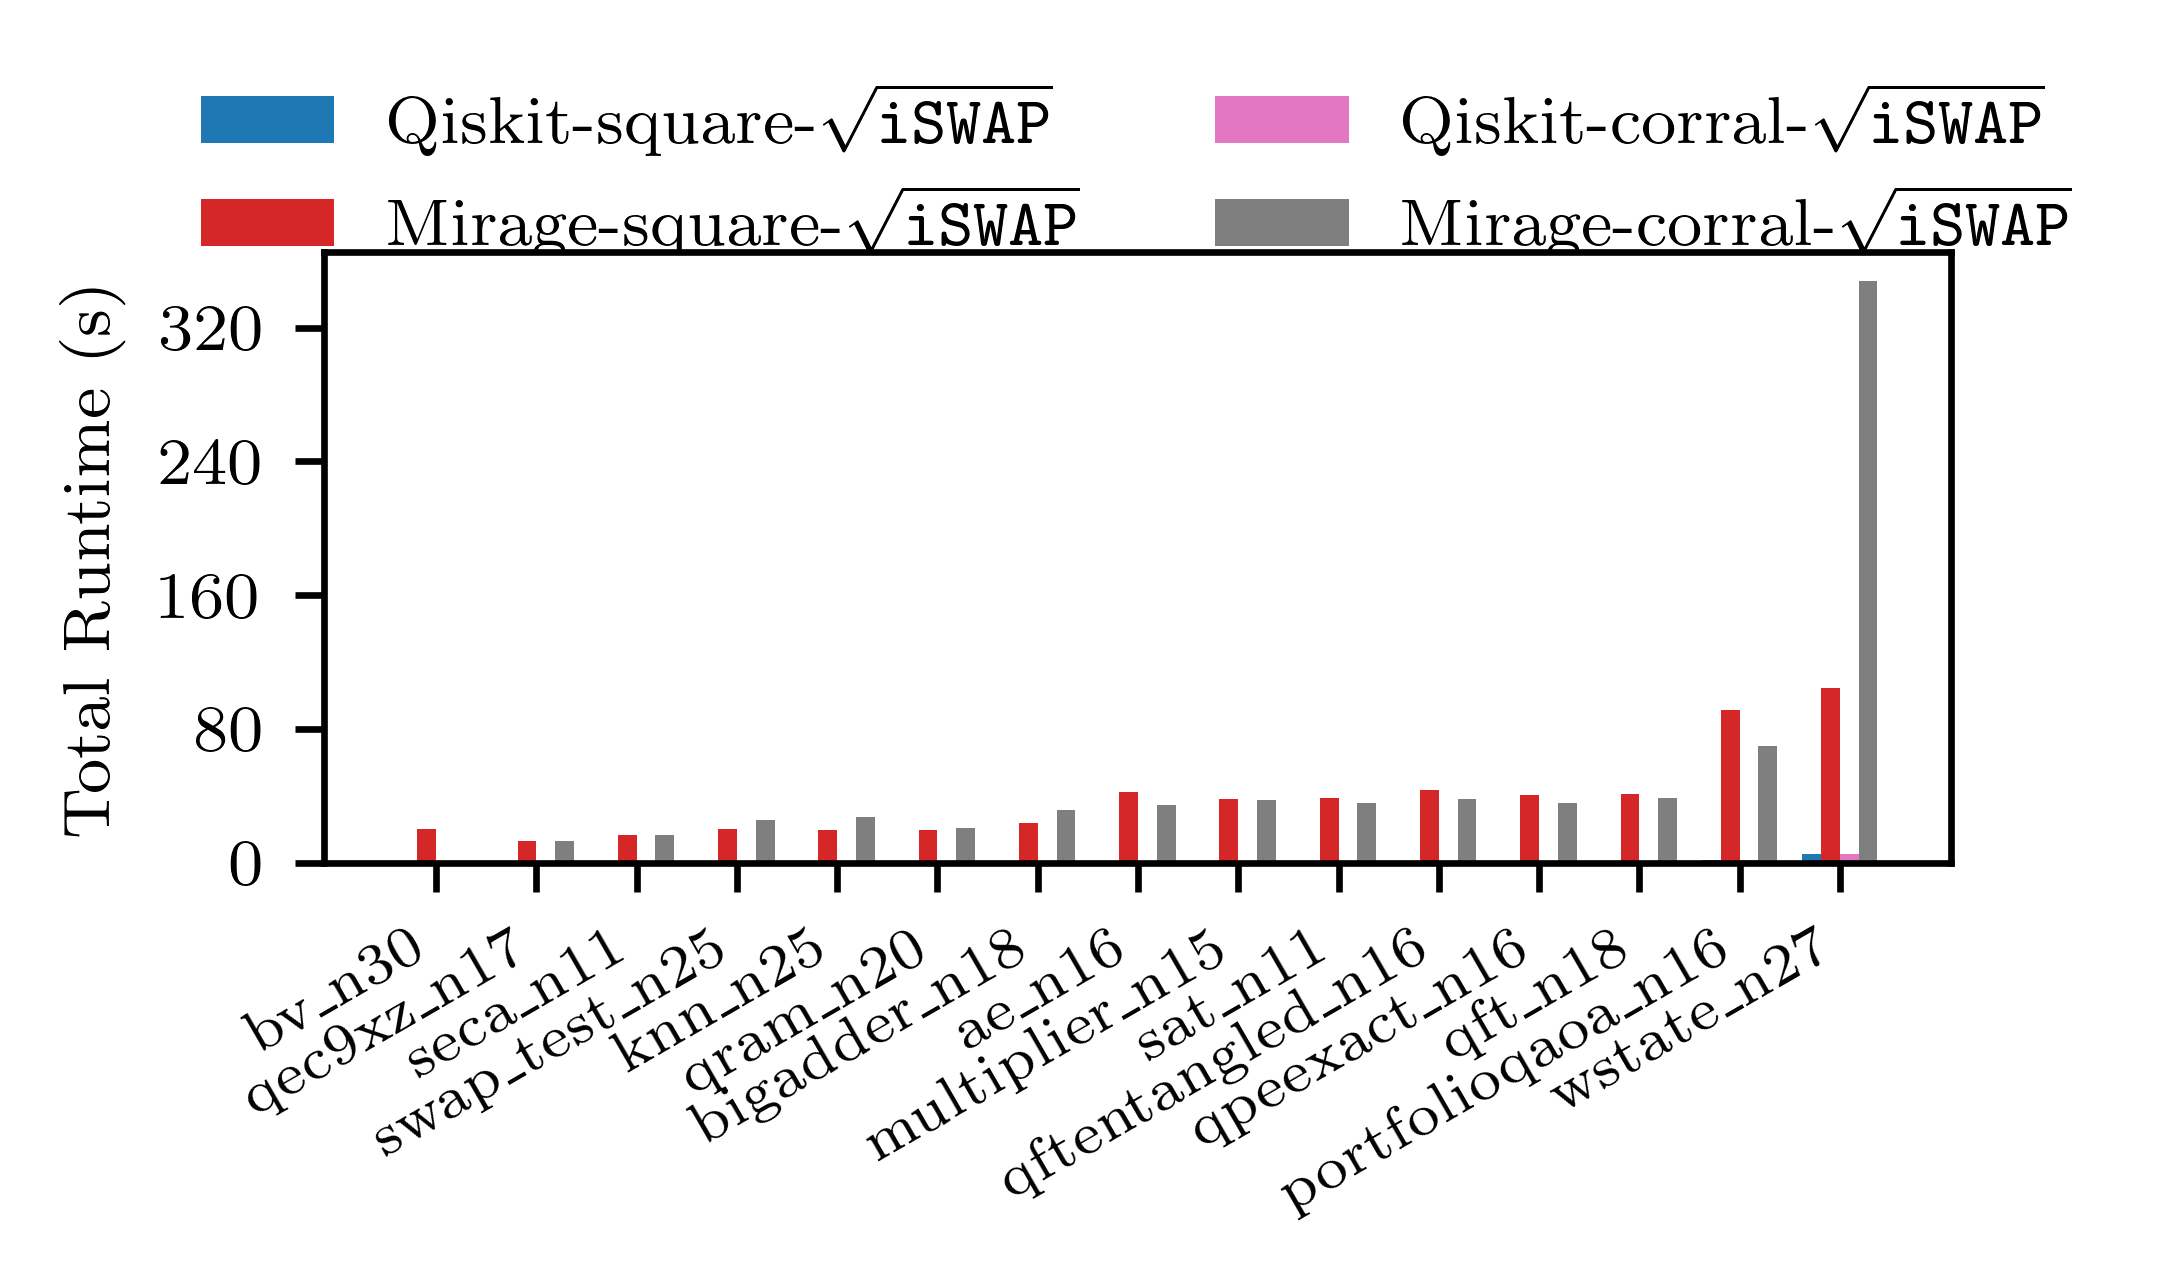

In [8]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(
    benchmark,
    save=0,
    legend_show=1,
    filename="grid",
    color_override=[0, 3, 6, 7],
)